In [1]:
# Notebook to validate name generation. Even though are names are random based off of the census data, that doesn't mean that 

In [2]:
import os
from collections import Counter,OrderedDict
from name_generator import gen_black_name, gen_white_name

In [3]:
folder_location = "names"
NAMES_TO_GEN = 5000

In [4]:
if not os.path.exists(folder_location):
    os.makedirs(folder_location)

In [5]:
aa_names = set() # [gen_black_name() for x in range(4000)]
while len(aa_names) <= NAMES_TO_GEN:
    aa_names.add(gen_black_name())
ca_names = set() # [gen_white_name() for x in range(4000)]
while len(ca_names) <= NAMES_TO_GEN:
    ca_names.add(gen_white_name())

In [6]:
with open(os.path.join(folder_location, "aa_names.txt"), "w") as f:
    f.writelines(line + '\n' for line in aa_names)
with open(os.path.join(folder_location, "ca_names.txt"), "w") as f:
    f.writelines(line + '\n' for line in ca_names)

# Analyze names

In [7]:
aa_name_list = []
ca_name_list = []
with open(os.path.join(folder_location, "aa_names.txt"), "r") as f:
    for line in f.read().splitlines():
        aa_name_list.append(line)
with open(os.path.join(folder_location, "ca_names.txt"), "r") as f:
    for line in f.read().splitlines():
        ca_name_list.append(line)
# aa_counter = Counter(aa_name_list)
# ca_counter = Counter(ca_name_list)

In [8]:
import gender_guesser.detector as gender
d = gender.Detector()
# Estimate gender
aa_fn_list = [d.get_gender(name.split(" ")[0]) for name in aa_name_list]
ca_fn_list = [d.get_gender(name.split(" ")[0]) for name in ca_name_list]

In [9]:
aa_counter = OrderedDict(sorted(Counter(aa_fn_list).items()))
aa_counter

OrderedDict([('andy', 70),
             ('female', 2613),
             ('male', 1878),
             ('mostly_female', 107),
             ('mostly_male', 148),
             ('unknown', 185)])

In [10]:
ca_counter = OrderedDict(sorted(Counter(ca_fn_list).items()))
ca_counter

OrderedDict([('andy', 51),
             ('female', 2381),
             ('male', 1942),
             ('mostly_female', 169),
             ('mostly_male', 154),
             ('unknown', 304)])

Looks like there's a bias in the aa names toward females compared to the ca names

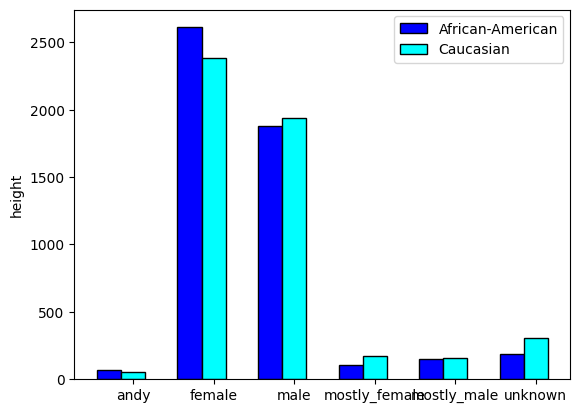

In [11]:
import matplotlib.pyplot as plt
import numpy as np


gender_means = {
    # 'Bill Depth': (18.35, 18.43, 14.98),
    # 'Bill Length': (38.79, 48.83, 47.50),
    # 'Flipper Length': (189.95, 195.82, 217.19),
}

for k,v in aa_counter.items():
    gender_means[k] = (v, ca_counter[k])
    
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = aa_counter.values()
 
# Choose the height of the cyan bars
bars2 = ca_counter.values()
 
# Choose the height of the error bars (bars1)
# yer1 = [0.5, 0.4, 0.5]
 # 
# Choose the height of the error bars (bars2)
# # yer2 = [1, 0.7, 1]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label="African-American")
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black',  capsize=7, label="Caucasian")
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], aa_counter.keys())
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()

# Next, we should validate ages are distributed evenly across names

https://fivethirtyeight.com/features/how-to-tell-someones-age-when-all-you-know-is-her-name/

In [12]:
from agefromname import AgeFromName
age_from_name = AgeFromName()

for name in aa_name_list:
    gender = d.get_gender(name.split(" ")[0])
    if gender == "male" or
age_from_name.prob_male('taylor')
0.24956599946849847
age_from_name.prob_female('taylor')
0.7504340005315016

SyntaxError: invalid syntax (2314682989.py, line 6)